# Predicting graduation rates group project

In this group project, you'll be predicting graduation rates (or, more specifically, the percent difference from the mean graduation rate) for high school students in different areas of the country.

As you may already know, [your illustrious instructor Dave Yerrington won a competition on this dataset.](http://devpost.com/software/sriozidave_datafordiploma)

---

### Dataset

The files for this project can be found in the `/DSI-SF-2/datasets/data_for_diplomas/` folder. The contents are:

    grad_train: the training data you will be building models on
    graduation_with_census_schema.pdf: the "codebook" for the grad_train.csv columns
    school_county_spending.csv: data on the spending of different schools
    school_county_spending_info.pdf: information about the spending data csv
    climate_data/: a folder that has climate data for every state for 2011 and 2012. There are csvs for precipitation and average temperature
    
This isn't all the data Dave used, but it's a decent amount of it. You're not expected to use _all_ of this data. After all, you don't have that long to build these models, but it's there if you want to.

**Target variable:**

In the spreadsheet there is a variable called `grad_pct_from_mean`. This is the difference in percent graduated for that school from the mean graduation rate across the country. In other words, it is:

    (schools graduation rate / (mean of all schools graduation rate) - 1.) * 100.
    
I changed this from the original rate column because, as you know, regression is not appropriate for prediction of rates since they are guaranteed to fall between 0 and 1.

**Do not include variables in the model that contain the same information as the target variable!** 

---

### Structure of the project

You will, in groups, try to build a model that predicts this `grad_pct_from_mean` variable using the information you have. 

**This project is also an excercise in using your time wisely.** You don't have that much time, so keep the scope of your process simple rather than complex. This will likely mean _not_ considering every variable available to you.

**I have left out 25% of the data as a testing set. At the end, groups will come up and get to test their model on the testing set.**

Since you will likely be cleaning the data, you will need to be able to run the testing code through the same cleaning and munging process as the training data. I recommend writing some functions that make this process faster/easier!

Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [292]:
grad_train = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/data_for_diplomas/grad_train.csv')
spending = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/data_for_diplomas/school_county_spending.csv')
climate = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/data_for_diplomas/combined_climate_data.csv')

print grad_train.shape
print spending.shape
print climate.shape

(7338, 580)
(14482, 66)
(50, 5)


In [189]:
pd.options.display.max_rows = 600

In [191]:
def merge_df(spending):
    spending = spending[spending.NCESID.apply(lambda x: x.isdigit())]
    spending.NCESID = spending.NCESID.map(lambda x: int(x))
    return spending
    
spending_mergeable = merge_df(spending)

In [196]:
spending_mergeable.head(2)

,IDCENSUS,NAME,CONUM,CSA,CBSA,NCESID,ENROLL,TOTALREV,TFEDREV,FEDRCOMP,...,PPSALWG,PPEMPBEN,PPITOTAL,PPISALWG,PPIEMBEN,PPSTOTAL,PPSPUPIL,PPSSTAFF,PPSGENAD,PPSSCHAD
0,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,1001,388,33860,100240,9825,77270,7416,1268,...,4332,1680,4288,2966,1075,2229,345,205,155,422
1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,100270,28700,277787,22367,5987,...,4783,1763,4757,3159,1136,2950,457,406,125,530


In [293]:
climate.head()

,Unnamed: 0,avg_temp,min_temp,max_temp,state_y
0,0,55.975000,42.6,63.8,Alaska
1,1,59.950000,49.7,66.9,Alabama
2,2,54.708333,44.7,60.9,Arkansas
3,3,57.091667,44.0,65.4,Arizona
4,4,41.008333,26.9,49.6,California


In [294]:
df_merged = grad_train.merge(spending_mergeable, left_on='leaid11', right_on='NCESID')
df_merged = df_merged.merge(climate, left_on='State_name', right_on='state_y')

In [295]:
df_merged.head().T

,0,1,2,3,4
leaid11,1808340,1810140,1806900,1807680,1802430
STNAM,INDIANA,INDIANA,INDIANA,INDIANA,INDIANA
FIPST,18,18,18,18,18
leanm11,Oak Hill United School Corp,Shelbyville Central Schools,Mitchell Community Schools,North Adams Community Schools,Covington Community Sch Corp
ALL_COHORT_1112,115,273,129,171,57
ALL_RATE_1112,92,89,87,92,90
MAM_COHORT_1112,1,1,NaN,1,NaN
MAM_RATE_1112,PS,PS,NaN,PS,NaN
MAS_COHORT_1112,NaN,NaN,NaN,NaN,1
MAS_RATE_1112,NaN,NaN,NaN,NaN,PS


In [383]:
df_merged.isnull().sum()

leaid11                                0
STNAM                                  0
FIPST                                  0
leanm11                                0
ALL_COHORT_1112                        0
ALL_RATE_1112                          0
MAM_COHORT_1112                     4447
MAM_RATE_1112                       4447
MAS_COHORT_1112                     3420
MAS_RATE_1112                       3420
MBL_COHORT_1112                     2586
MBL_RATE_1112                       2586
MHI_COHORT_1112                     1894
MHI_RATE_1112                       1894
MTR_COHORT_1112                     4219
MTR_RATE_1112                       4219
MWH_COHORT_1112                       76
MWH_RATE_1112                         76
CWD_COHORT_1112                      212
CWD_RATE_1112                        212
ECD_COHORT_1112                      102
ECD_RATE_1112                        102
LEP_COHORT_1112                     3877
Percentage                             0
State           

In [384]:
# Percent not null in each column
percent_not_null = (grad_train.shape[0] - grad_train.isnull().sum()) / 7338.0 * 100
# grad_dropped = df_merged.drop(df_merged[percent_not_null[percent_not_null < 99.3].index], axis=1)
grad_dropped = df_merged.copy()

In [385]:
grad_dropped.shape

(7297, 651)

In [386]:
grad_dropped.columns = [col_name.lower().replace(' ', '_').replace('.', '_').replace('(', '').replace(')', '').replace('-', '_') for col_name in grad_dropped.columns]
grad_dropped.dtypes

leaid11                               int64
stnam                                object
fipst                                 int64
leanm11                              object
all_cohort_1112                       int64
all_rate_1112                       float64
mam_cohort_1112                     float64
mam_rate_1112                        object
mas_cohort_1112                     float64
mas_rate_1112                        object
mbl_cohort_1112                     float64
mbl_rate_1112                        object
mhi_cohort_1112                     float64
mhi_rate_1112                        object
mtr_cohort_1112                     float64
mtr_rate_1112                        object
mwh_cohort_1112                     float64
mwh_rate_1112                        object
cwd_cohort_1112                     float64
cwd_rate_1112                        object
ecd_cohort_1112                     float64
ecd_rate_1112                        object
lep_cohort_1112                 

In [450]:
import patsy
df = grad_dropped.copy()

# county['PPSALWG','PPISALWG']

# land_area
# rural_pop_cen_2010
# nh_white_alone_cen_2010
# nh_white_alone_acs_08_12

# percentage???
# land_area
# rural_pop_cen_2010
# pct_rural_pop_cen_2010
# pop_under_5_cen_2010
# nh_white_alone_cen_2010
# nh_white_alone_acs_08_12


all_columns = "" + " + ".join([
#         'pct_prs_blw_pov_lev_acs_08_12',
        'land_area',
#         'rural_pop_cen_2010',
        'pct_rural_pop_cen_2010',
#         'pop_under_5_cen_2010',
#         'pct_not_mrdcple_hhd_acs_08_12', 
#         'pct_not_mrdcple_hhd_cen_2010',
#         'nh_white_alone_cen_2010',
#         'pct_frst_frms_cen_2010',
        'state_name',
        'nh_blk_alone_acsmoe_08_12',
#         'nh_aian_alone_cen_2010',
        'pub_asst_inc_acs_08_12',
        'not_mrdcple_hhd_cen_2010',
        'hhd_ppl_und_18_cen_2010',
        'pct_nh_white_alone_cen_2010',
        'ppsalwg',
        
#         'min_temp',
#         'max_temp'
#         'ecd_rate_1112'
                              ])


# all_columns = "" + " + ".join(df.columns[:450].difference(['all_rate_1112', 'grad_pct_from_mean', 'tract', 'tract_code', 'leaid11', 'stnam', 'leanm11', 'school_district', 'county_name', 'gidtr']))
# all_columns = "" + " + ".join(['pct_prs_blw_pov_lev_acs_08_12','pct_not_mrdcple_hhd_acs_08_12', 'pct_not_mrdcple_hhd_cen_2010','ecd_rate_1112', 'ppsalwg', 'ppisalwg'])
# all_columns = "" + " + ".join(['pct_prs_blw_pov_lev_acs_08_12','pct_not_mrdcple_hhd_acs_08_12', 'pct_not_mrdcple_hhd_cen_2010', 'ppsalwg', 'ppisalwg'])
# all_columns = "" + " + ".join(['pct_prs_blw_pov_lev_acs_08_12','pct_not_mrdcple_hhd_acs_08_12','ecd_rate_1112'])
# all_columns = "" + " + ".join(['pct_prs_blw_pov_lev_acs_08_12','pct_not_mrdcple_hhd_acs_08_12'])
# all_columns = "" + " + ".join(['ppsalwg', 'ppisalwg'])
formula = "grad_pct_from_mean ~ " + all_columns + " - 1"
print formula

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
print X.shape
print y.shape

grad_pct_from_mean ~ land_area + pct_rural_pop_cen_2010 + state_name + nh_blk_alone_acsmoe_08_12 + pub_asst_inc_acs_08_12 + not_mrdcple_hhd_cen_2010 + hhd_ppl_und_18_cen_2010 + pct_nh_white_alone_cen_2010 + ppsalwg - 1
(7259, 53)
(7259, 1)


In [451]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(5807, 53) (5807,)
(1452, 53) (1452,)


In [452]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

optimal_elastic = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], n_alphas=500, cv=5, verbose=1, n_jobs=1)
model = optimal_elastic.fit(X_train, y_train)
# model = ElasticNet(alpha=optimal_elastic.alpha_, l1_ratio=optimal_elastic.l1_ratio_).fit(X_train, y_train)

print "Optimal alpha:", optimal_elastic.alpha_
print "Optimal L1 ratio:", optimal_elastic.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Optimal alpha: 3.72244420751
Optimal L1 ratio: 1.0


....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    3.2s finished


Model Score: 0.210025001416


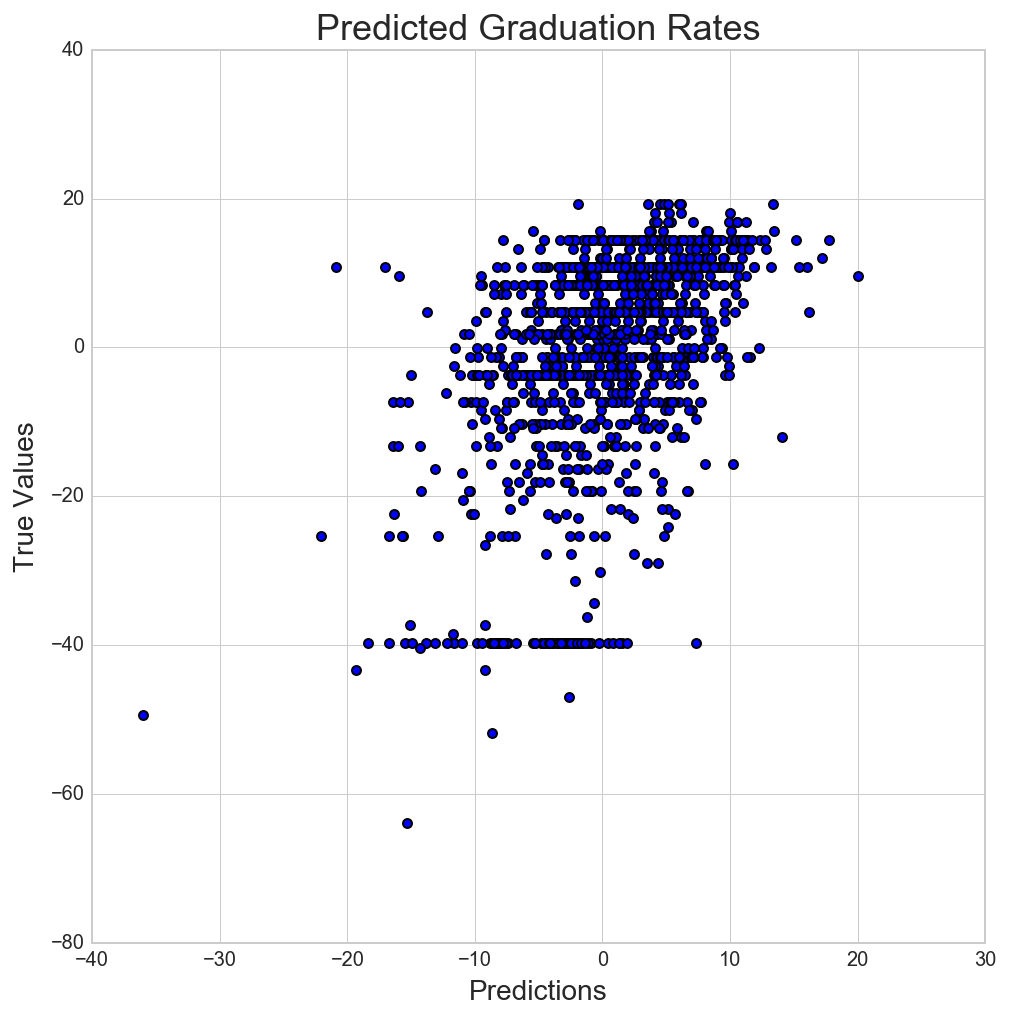

In [453]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[8,8])

plt.xlabel('Predictions', fontsize=14)
plt.ylabel('True Values', fontsize=14)
plt.title("Predicted Graduation Rates", fontsize=18)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

plt.scatter(predictions, y_test)
print 'Model Score:', score

In [455]:
pd.DataFrame(zip(model.coef_, X.columns)).sort_values(0)

,0,1
46,-0.082611,pct_rural_pop_cen_2010
48,-0.036211,pub_asst_inc_acs_08_12
47,-0.010688,nh_blk_alone_acsmoe_08_12
49,-0.003667,not_mrdcple_hhd_cen_2010
45,-0.000893,land_area
52,-0.000498,ppsalwg
28,0.000000,state_name[New York]
29,0.000000,state_name[North Carolina]
30,-0.000000,state_name[North Dakota]
31,0.000000,state_name[Ohio]


In [ ]:
# percentage???
# land_area
# rural_pop_cen_2010
# pct_rural_pop_cen_2010
# pop_under_5_cen_2010
# nh_white_alone_cen_2010
# nh_white_alone_acs_08_12

In [ ]:
# NH_White_alone_CEN_2010             0.308069
# NH_White_alone_ACS_08_12            0.308737
# pct_Census_Mail_Returns_CEN_2010    0.330205
# pct_FRST_FRMS_CEN_2010              0.330416

In [458]:
grad_test = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/data_for_diplomas/grad_test.csv')

In [191]:
def merge_df(spending):
    spending = spending[spending.NCESID.apply(lambda x: x.isdigit())]
    spending.NCESID = spending.NCESID.map(lambda x: int(x))
    return spending
    
spending_mergeable = merge_df(spending)

In [459]:
df_merged = grad_test.merge(spending_mergeable, left_on='leaid11', right_on='NCESID')
df_merged = df_merged.merge(climate, left_on='State_name', right_on='state_y')

In [384]:
# Percent not null in each column
percent_not_null = (grad_train.shape[0] - grad_train.isnull().sum()) / 7338.0 * 100
# grad_dropped = df_merged.drop(df_merged[percent_not_null[percent_not_null < 99.3].index], axis=1)
grad_dropped = df_merged.copy()

In [385]:
grad_dropped.shape

(7297, 651)

In [460]:
df_merged.columns = [col_name.lower().replace(' ', '_').replace('.', '_').replace('(', '').replace(')', '').replace('-', '_') for col_name in grad_dropped.columns]
df_merged.dtypes

leaid11                               int64
stnam                                object
fipst                                 int64
leanm11                              object
all_cohort_1112                       int64
all_rate_1112                       float64
mam_cohort_1112                     float64
mam_rate_1112                        object
mas_cohort_1112                     float64
mas_rate_1112                        object
mbl_cohort_1112                     float64
mbl_rate_1112                        object
mhi_cohort_1112                     float64
mhi_rate_1112                        object
mtr_cohort_1112                     float64
mtr_rate_1112                        object
mwh_cohort_1112                     float64
mwh_rate_1112                        object
cwd_cohort_1112                     float64
cwd_rate_1112                        object
ecd_cohort_1112                     float64
ecd_rate_1112                        object
lep_cohort_1112                 

In [461]:
import patsy
df = df_merged.copy()

# county['PPSALWG','PPISALWG']

# land_area
# rural_pop_cen_2010
# nh_white_alone_cen_2010
# nh_white_alone_acs_08_12

# percentage???
# land_area
# rural_pop_cen_2010
# pct_rural_pop_cen_2010
# pop_under_5_cen_2010
# nh_white_alone_cen_2010
# nh_white_alone_acs_08_12


all_columns = "" + " + ".join([
#         'pct_prs_blw_pov_lev_acs_08_12',
        'land_area',
#         'rural_pop_cen_2010',
        'pct_rural_pop_cen_2010',
#         'pop_under_5_cen_2010',
#         'pct_not_mrdcple_hhd_acs_08_12', 
#         'pct_not_mrdcple_hhd_cen_2010',
#         'nh_white_alone_cen_2010',
#         'pct_frst_frms_cen_2010',
        'state_name',
        'nh_blk_alone_acsmoe_08_12',
#         'nh_aian_alone_cen_2010',
        'pub_asst_inc_acs_08_12',
        'not_mrdcple_hhd_cen_2010',
        'hhd_ppl_und_18_cen_2010',
        'pct_nh_white_alone_cen_2010',
        'ppsalwg',
        
#         'min_temp',
#         'max_temp'
#         'ecd_rate_1112'
                              ])


# all_columns = "" + " + ".join(df.columns[:450].difference(['all_rate_1112', 'grad_pct_from_mean', 'tract', 'tract_code', 'leaid11', 'stnam', 'leanm11', 'school_district', 'county_name', 'gidtr']))
# all_columns = "" + " + ".join(['pct_prs_blw_pov_lev_acs_08_12','pct_not_mrdcple_hhd_acs_08_12', 'pct_not_mrdcple_hhd_cen_2010','ecd_rate_1112', 'ppsalwg', 'ppisalwg'])
# all_columns = "" + " + ".join(['pct_prs_blw_pov_lev_acs_08_12','pct_not_mrdcple_hhd_acs_08_12', 'pct_not_mrdcple_hhd_cen_2010', 'ppsalwg', 'ppisalwg'])
# all_columns = "" + " + ".join(['pct_prs_blw_pov_lev_acs_08_12','pct_not_mrdcple_hhd_acs_08_12','ecd_rate_1112'])
# all_columns = "" + " + ".join(['pct_prs_blw_pov_lev_acs_08_12','pct_not_mrdcple_hhd_acs_08_12'])
# all_columns = "" + " + ".join(['ppsalwg', 'ppisalwg'])
formula = "grad_pct_from_mean ~ " + all_columns + " - 1"
print formula

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
print X.shape
print y.shape

grad_pct_from_mean ~ land_area + pct_rural_pop_cen_2010 + state_name + nh_blk_alone_acsmoe_08_12 + pub_asst_inc_acs_08_12 + not_mrdcple_hhd_cen_2010 + hhd_ppl_und_18_cen_2010 + pct_nh_white_alone_cen_2010 + ppsalwg - 1
(2419, 53)
(2419, 1)


In [462]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

y = np.ravel(y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#print X_train.shape, y_train.shape
#print X_test.shape, y_test.shape

In [452]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

optimal_elastic = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], n_alphas=500, cv=5, verbose=1, n_jobs=1)
model = optimal_elastic.fit(X_train, y_train)
# model = ElasticNet(alpha=optimal_elastic.alpha_, l1_ratio=optimal_elastic.l1_ratio_).fit(X_train, y_train)

print "Optimal alpha:", optimal_elastic.alpha_
print "Optimal L1 ratio:", optimal_elastic.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Optimal alpha: 3.72244420751
Optimal L1 ratio: 1.0


....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    3.2s finished


In [463]:
optimal_elastic.score(X, y)

0.20851409058535275

Model Score: 0.210025001416


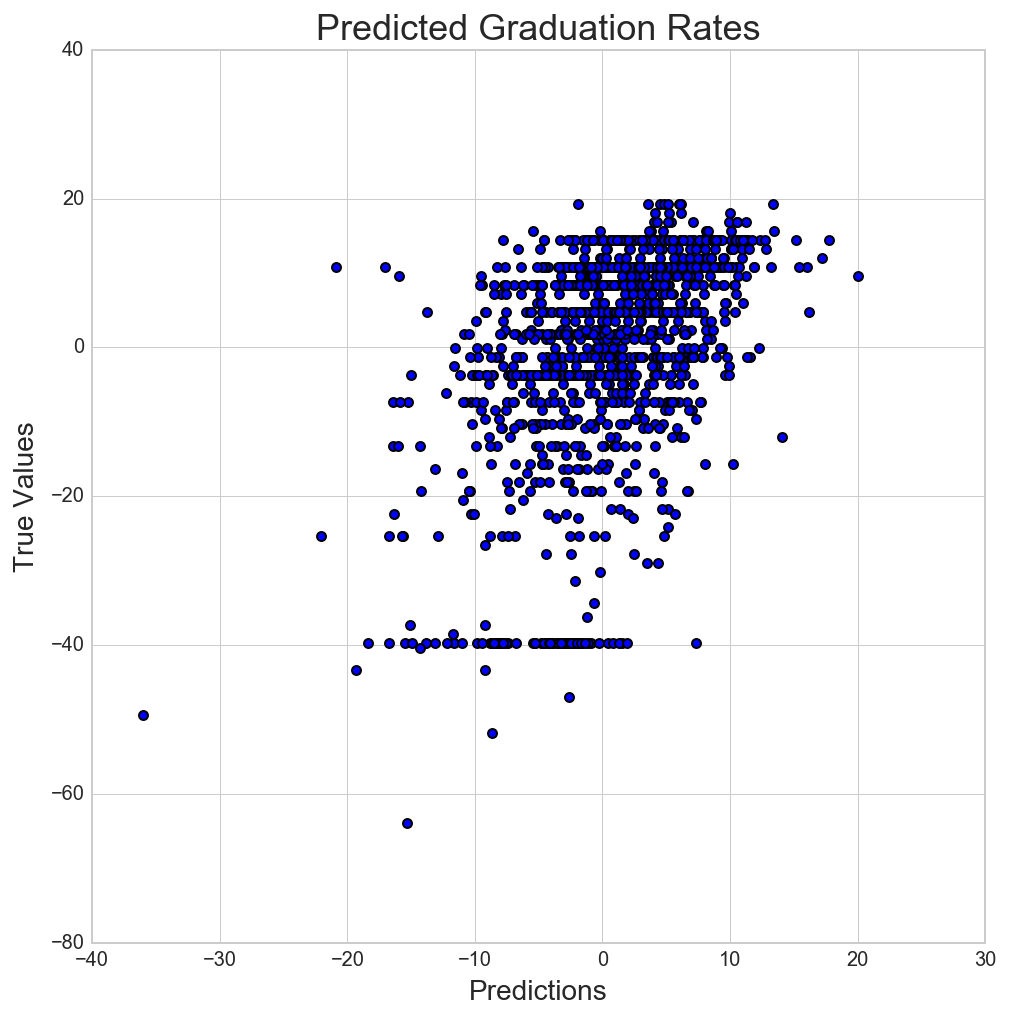

In [453]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[8,8])

plt.xlabel('Predictions', fontsize=14)
plt.ylabel('True Values', fontsize=14)
plt.title("Predicted Graduation Rates", fontsize=18)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

plt.scatter(predictions, y_test)
print 'Model Score:', score